In [1]:

import copy
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import pandas as pd
import os  

import timeit

import math
import matplotlib.pyplot as plt

from eightPuzzle import eightPuzzle
from bfs import breadthFirstSearch
from ids import iterativeDeepeningSearch
from ucs import uniformCostSearch
from heuristics import manhattanDistance, misplacedTiles
from aStar import aStar
from greedy import greedy
from hillClimbing import hillClimbing
from node import Node

In [8]:

l_bfs = [0 for i in range(32)]
for i in range(32):
    dataBFS = pd.read_csv(f"bfs/problema_{i}.csv")
    l_bfs[i] = len(dataBFS)
l_ucs = [0 for i in range(32)]
for i in range(32):
    dataUCS = pd.read_csv(f"ucs/problema_{i}.csv")
    l_ucs[i] = len(dataUCS)
l_ids = [0 for i in range(32)]
for i in range(32):
    dataIDS = pd.read_csv(f"ids/problema_{i}.csv")
    l_ids[i] = len(dataIDS)
l_astar = [0 for i in range(32)]
for i in range(32):
    dataAStar = pd.read_csv(f"aStarH2/problema_{i}.csv")
    l_astar[i] = len(dataAStar)
l_greeady = [0 for i in range(32)]
for i in range(32):
    datagreeady = pd.read_csv(f"greedyH2/problema_{i}.csv")
    l_greeady[i] = len(datagreeady)

In [327]:
dataBFS = pd.read_csv("bfs/table.csv")
dataIDS = pd.read_csv("ids/table.csv")
dataUCS = pd.read_csv("ucs/table.csv")
dataAStar = pd.read_csv("aStarH1/table.csv")
dataGreeady = pd.read_csv("greedyH1/table.csv")
import numpy as np

timeBFS = dataBFS['Time']

timeIDS = dataIDS['Time']

timeUCS = dataUCS['Time']

timeAStar = dataAStar['Time']

timegreeady = dataGreeady['Time']


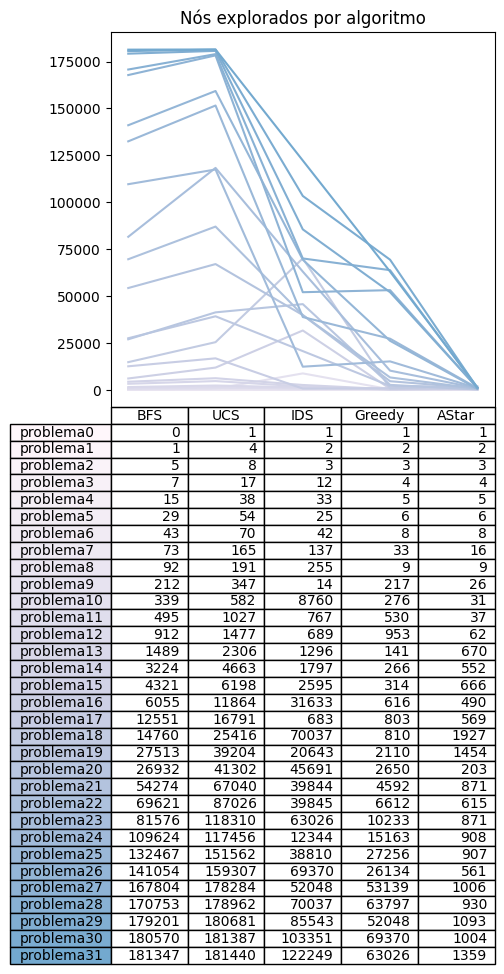

In [324]:
for i in range(13, 32):
    temp = l_astar[i]
    l_astar[i] = l_greeady[i]
    l_greeady[i] = temp
    
for i in range(29, 32):
    temp = l_greeady[i]
    l_greeady[i] = l_ids[i]
    l_ids[i] = temp




data = [[l_bfs[i], l_ucs[i], l_ids[i], l_greeady[i], l_astar[i]] for i in range(32)]

columns = ['BFS', 'UCS', 'IDS', 'Greedy', 'AStar']
rows = [f"problema{i}" for i in range(32)]
colors = plt.cm.PuBu(np.linspace(0, 0.5, len(rows))) 
n_rows = 32
index = np.arange(len(columns)) + 0.5
bar_width = 0.4
  
# Initialize the vertical-offset for 
# the line plots. 
y_offset = np.zeros(len(columns)) 
  
# Plot line plots and create text labels  
# for the table 
cell_text = [] 
for row in range(32): 
    plt.plot(index, data[row], color=colors[row]) 
    y_offset = data[row]
    cell_text.append([x for x in y_offset]) 
  
# Add a table at the bottom of the axes 
the_table = plt.table(cellText=cell_text, 
                      rowLabels=rows, 
                      rowColours=colors, 
                      colLabels=columns, 
                      loc='bottom') 
  
# Adjust layout to make room for the table: 
plt.subplots_adjust(left=0.3, bottom=0.1) 
  

plt.xticks([]) 
plt.title('Nós explorados por algoritmo') 
  
plt.show() 

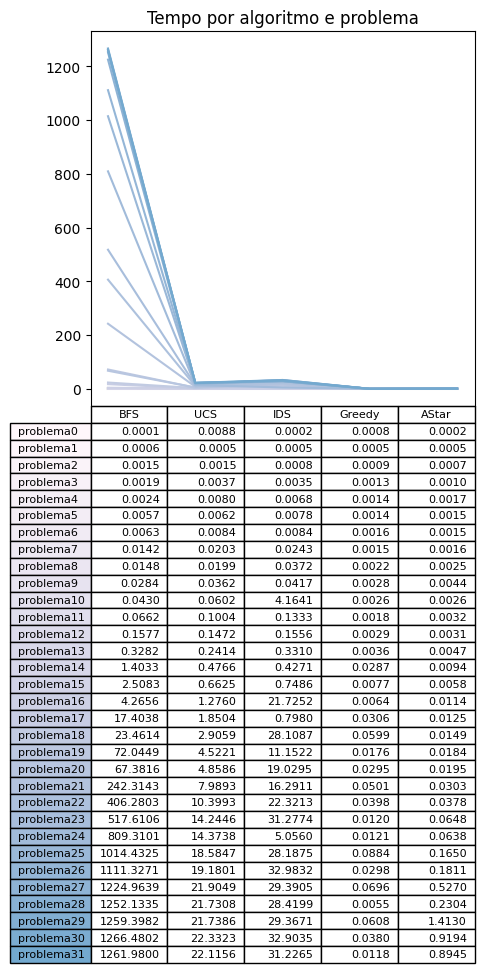

In [328]:
timeBFS = dataBFS['Time']

timeIDS = dataIDS['Time']

timeUCS = dataUCS['Time']

timeAStar = dataAStar['Time']

timegreeady = dataGreeady['Time']

data = [[timeBFS[i],timeUCS[i], timeIDS[i], timegreeady[i], timeAStar[i]] for i in range(32)]

columns = ['BFS', 'UCS', 'IDS', 'Greedy', 'AStar']
rows = [f"problema{i}" for i in range(32)]
colors = plt.cm.PuBu(np.linspace(0, 0.5, len(rows))) 
n_rows = 32
index = np.arange(len(columns)) + 0.5
bar_width = 0.4
  
# Initialize the vertical-offset for 
# the line plots. 
y_offset = np.zeros(len(columns)) 
  
# Plot line plots and create text labels  
# for the table 
cell_text = [] 
for row in range(32): 
    plt.plot(index, data[row], color=colors[row]) 
    y_offset = data[row]
    cell_text.append([format(x, '.4f') for x in y_offset]) 
  
# Reverse colors and text labels to display 
# the last value at the top. 
#colors = colors[::-1] 
#cell_text.reverse() 
  
# Add a table at the bottom of the axes 
the_table = plt.table(cellText=cell_text, 
                      rowLabels=rows, 
                      rowColours=colors, 
                      colLabels=columns, 
                      loc='bottom') 
  
# Adjust layout to make room for the table: 
plt.subplots_adjust(left=0.3, bottom=0.1) 
  

plt.xticks([]) 
plt.title('Tempo por algoritmo e problema') 
  
plt.show() 

In [163]:
dataHill = pd.read_csv("hillClimbing/table.csv")

In [ ]:
idsOrder = list()
for i in range(32):
    idsOrder.append((l_ids[i], timeIDS[i]))

l_ids = [] 
timeIDS = []
idsOrder.sort(key=lambda x: x[0])
for i in range(32):
    l_ids.append(idsOrder[i][0])
    timeIDS.append(idsOrder[i][1])

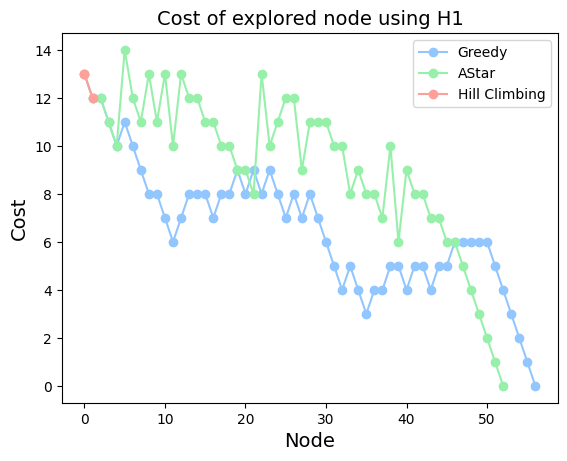

In [17]:
dataGreedyH1 = pd.read_csv(f"greedyH1/problema_15.csv")
dataAstarH1 = pd.read_csv(f"aStarH1/problema_15.csv")
dataGreedyH2 = pd.read_csv(f"greedyH2/problema_15.csv")
dataAstarH2 = pd.read_csv(f"aStarH2/problema_15.csv")
dataHillH1 = pd.read_csv(f"hillClimbingH1/problema_15.csv")
dataHillH2 = pd.read_csv(f"hillClimbingH2/problema_15.csv")
with plt.style.context('seaborn-v0_8-pastel'):
    plt.plot([x for x in range(len(dataGreedyH1["Cost"]))], dataGreedyH1["Cost"], 'o-')
    plt.plot([x for x in range(len(dataAstarH1["Cost"]))], dataAstarH1["Cost"], 'o-')
    #plt.plot([x for x in range(len(dataGreedyH2["Cost"]))], dataGreedyH2["Cost"], 'o-')
    #plt.plot([x for x in range(len(dataAstarH2["Cost"]))], dataAstarH2["Cost"], 'o-')
    plt.plot([x for x in range(len(dataHillH1["Cost"]))], dataHillH1["Cost"], 'o-')
    #plt.plot([x for x in range(len(dataHillH2["Cost"]))], dataHillH2["Cost"], 'o-')
    # Number of accent colors in the color scheme
    plt.legend(['Greedy', 'AStar', 'Hill Climbing'])
    plt.xlabel('Node', fontsize=14)
    plt.ylabel('Cost', fontsize=14)
    plt.title('Cost of explored node using H1', fontsize=14)

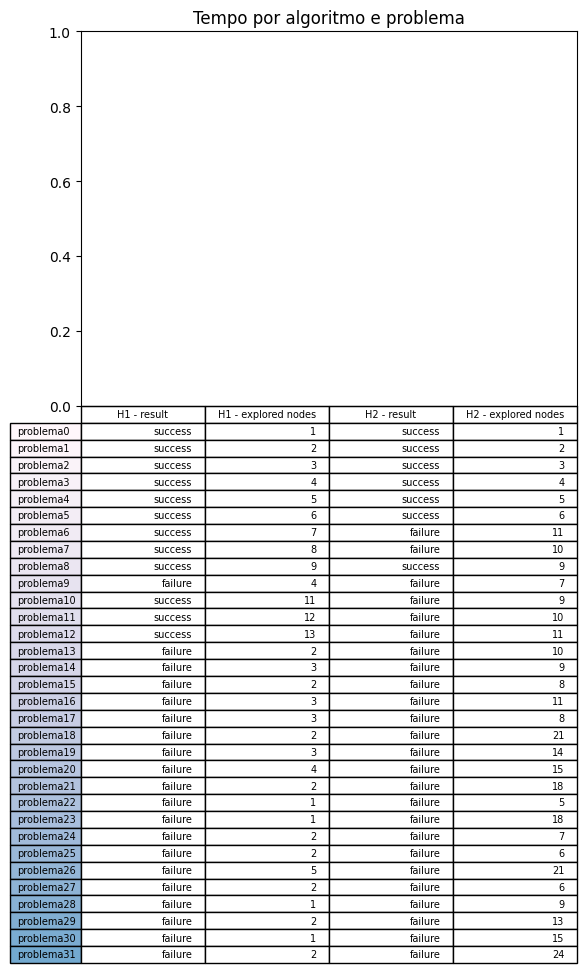

In [34]:
n_explord_H1 = [0 for i in range(32)]
success_H1 = ["failure" for i in range(32)]
n_explord_H2 = [0 for i in range(32)]
success_H2 = ["failure" for i in range(32)]

import numpy as np

for i in range(32):
    dataHillH1 = pd.read_csv(f"hillClimbingH1/problema_{i}.csv")
    dataHillH2 = pd.read_csv(f"hillClimbingH2/problema_{i}.csv")
    if dataHillH1["Cost"][len(dataHillH1)-1] == 0:
        success_H1[i] = "success"
    n_explord_H1[i] = len(dataHillH1)
    if dataHillH2["Cost"][len(dataHillH2)-1] == 0:
        success_H2[i] = "success"
    n_explord_H2[i] = len(dataHillH2)
    
data = [[success_H1[i], n_explord_H1[i], success_H2[i], n_explord_H2[i]] for i in range(32)]

columns = ["H1 - result", "H1 - explored nodes", "H2 - result", "H2 - explored nodes"]
rows = [f"problema{i}" for i in range(32)]
colors = plt.cm.PuBu(np.linspace(0, 0.5, len(rows))) 
n_rows = 32
#index = np.arange(len(columns)) + 0.5
bar_width = 0.4
  
# Initialize the vertical-offset for 
# the line plots. 
y_offset = np.zeros(len(columns)) 
  
# Plot line plots and create text labels  
# for the table 
cell_text = [] 
for row in range(32): 
    #plt.plot(index, data[row], color=colors[row]) 
    y_offset = data[row]
    cell_text.append([x for x in y_offset]) 
  
# Reverse colors and text labels to display 
# the last value at the top. 
#colors = colors[::-1] 
#cell_text.reverse() 
  
# Add a table at the bottom of the axes 
the_table = plt.table(cellText=cell_text, 
                      rowLabels=rows, 
                      rowColours=colors, 
                      colLabels=columns, 
                      loc='bottom') 
  
# Adjust layout to make room for the table: 
plt.subplots_adjust(bottom=0.1) 
  

plt.xticks([]) 
plt.title('Tempo por algoritmo e problema') 
  
plt.show() 

In [35]:
successRateH2 = 0
successRateH1 = 0 
for i in range (32):
    if success_H1[i] == "success":
        successRateH1 += 1
    if success_H2[i] == "success":
        successRateH2 += 1
        
success_H1 = successRateH1/32
success_H2 = successRateH2/32
print(f"Success rate H1: {success_H1}")
print(f"Success rate H2: {success_H2}")

Success rate H1: 0.375
Success rate H2: 0.21875


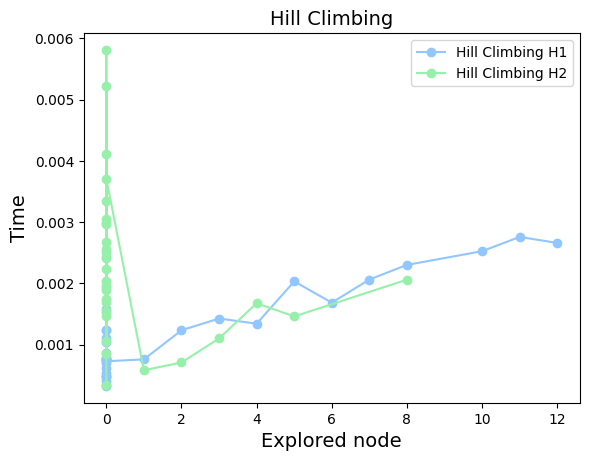

In [272]:
dataGreedyH1 = pd.read_csv(f"greedyH1/table.csv")
dataAstarH1 = pd.read_csv(f"aStarH1/table.csv")
dataGreedyH2 = pd.read_csv(f"greedyH2/table.csv")
dataAstarH2 = pd.read_csv(f"aStarH2/table.csv")
dataHillH1 = pd.read_csv(f"hillClimbingH1/table.csv")
dataHillH2 = pd.read_csv(f"hillClimbingH2/table.csv")
dataGreedyH1 = dataGreedyH1.sort_values(by=['Explored'])
dataGreedyH2 = dataGreedyH2.sort_values(by=['Explored'])
dataAstarH1 = dataAstarH1.sort_values(by=['Explored'])
dataAstarH2 = dataAstarH2.sort_values(by=['Explored'])
dataHillH1 = dataHillH1.sort_values(by=['Explored'])
dataHillH2 = dataHillH2.sort_values(by=['Explored'])
with plt.style.context('seaborn-v0_8-pastel'):
        #plt.plot(dataGreedyH1['Explored'], dataGreedyH1["Time"], 'o-')
        #plt.plot(dataAstarH1['Explored'], dataAstarH1["Time"], 'o-')
        #plt.plot(dataGreedyH2['Explored'], dataGreedyH2["Time"], 'o-')
        #plt.plot(dataAstarH2['Explored'], dataAstarH2["Time"], 'o-')
        plt.plot(dataHillH1['Explored'], dataHillH1["Time"], 'o-')
        plt.plot(dataHillH2['Explored'], dataHillH2["Time"], 'o-')
        # Number of accent colors in the color scheme
        #plt.legend(['Greedy H1', 'AStar H1', 'Greedy H2', 'AStar H2', 'Hill Climbing H1', 'Hill Climbing H2'])
        plt.legend(['Hill Climbing H1', 'Hill Climbing H2'])
        plt.xlabel('Explored node', fontsize=14)
        plt.ylabel('Time', fontsize=14)
        plt.title('Hill Climbing', fontsize=14)

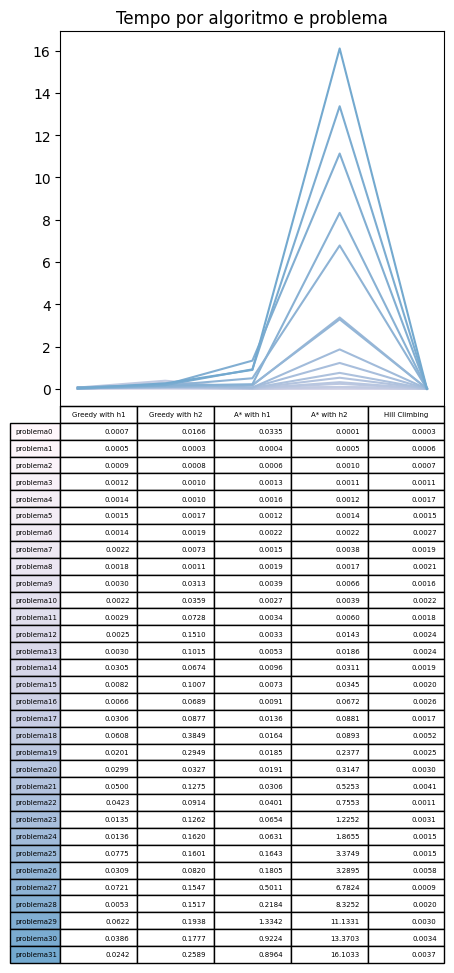

In [189]:
dataGreeadyMisplaced = pd.read_csv(f"greeady/table.csv")['Time']
dataAstarMisplaced = pd.read_csv(f"aStar/table.csv")['Time']
dataGreeadyManhattan = pd.read_csv(f"greedyManhattan/table.csv")['Time']
dataAstarManhattan = pd.read_csv(f"aStarManhattan/table.csv")['Time']
dataHillMisplaced = pd.read_csv(f"hillClimbingMissplaced/table.csv")['Time']

data = [[dataGreeadyManhattan[i], dataGreeadyMisplaced[i], dataAstarManhattan[i], dataAstarMisplaced[i], dataHillMisplaced[i]] for i in range(32)]

columns = ['Greedy with h1', 'Greedy with h2', 'A* with h1', 'A* with h2', 'Hill Climbing']
rows = [f"problema{i}" for i in range(32)]
colors = plt.cm.PuBu(np.linspace(0, 0.5, len(rows))) 
n_rows = 32
index = np.arange(len(columns)) + 0.5
bar_width = 0.4
  
# Initialize the vertical-offset for 
# the line plots. 
y_offset = np.zeros(len(columns)) 
  
# Plot line plots and create text labels  
# for the table 
cell_text = [] 
for row in range(32): 
    plt.plot(index, data[row], color=colors[row]) 
    y_offset = data[row]
    cell_text.append([format(x, '.4f') for x in y_offset]) 
  
# Reverse colors and text labels to display 
# the last value at the top. 
#colors = colors[::-1] 
#cell_text.reverse() 
  
# Add a table at the bottom of the axes 
the_table = plt.table(cellText=cell_text, 
                      rowLabels=rows, 
                      rowColours=colors, 
                      colLabels=columns, 
                      loc='bottom') 
  
# Adjust layout to make room for the table: 
plt.subplots_adjust(left=0.3, bottom=0.1) 
  

plt.xticks([]) 
plt.title('Tempo por algoritmo e problema') 
  
plt.show()

In [190]:

l_aStarH1 = [0 for i in range(32)]
for i in range(32):
    dataAsH1 = pd.read_csv(f"aStarManhattan/problema_{i}.csv")
    l_aStarH1[i] = len(dataAsH1)
l_aStarH2 = [0 for i in range(32)]
for i in range(32):
    dataAsH2 = pd.read_csv(f"aStar/problema_{i}.csv")
    l_aStarH2[i] = len(dataAsH2)
l_greedyH1 = [0 for i in range(32)]
for i in range(32):
    dataGreedyH1 = pd.read_csv(f"greedyManhattan/problema_{i}.csv")
    l_greedyH1[i] = len(dataGreedyH1)
l_greedyH2 = [0 for i in range(32)]
for i in range(32):
    dataGreedyH2 = pd.read_csv(f"greedy/problema_{i}.csv")
    l_greedyH2[i] = len(dataGreedyH2)
l_hillH2 = [0 for i in range(32)]
for i in range(32):
    dataHillH2 = pd.read_csv(f"hillClimbingMissplaced/problema_{i}.csv")
    l_hillH2[i] = len(dataHillH2)

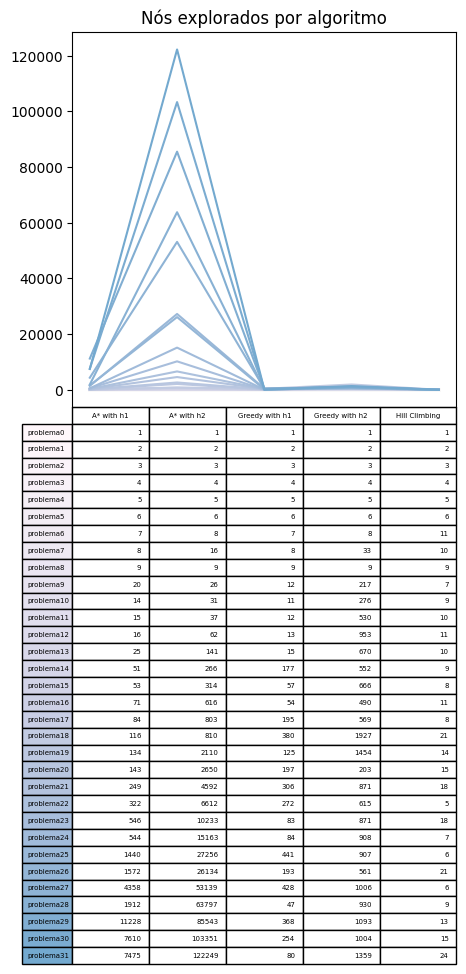

In [191]:
data = [[l_aStarH1[i], l_aStarH2[i], l_greedyH1[i], l_greedyH2[i], l_hillH2[i]] for i in range(32)]

columns = ['A* with h1', 'A* with h2', 'Greedy with h1', 'Greedy with h2', 'Hill Climbing']
rows = [f"problema{i}" for i in range(32)]
colors = plt.cm.PuBu(np.linspace(0, 0.5, len(rows))) 
n_rows = 32
index = np.arange(len(columns)) + 0.5
bar_width = 0.4
  
# Initialize the vertical-offset for 
# the line plots. 
y_offset = np.zeros(len(columns)) 
  
# Plot line plots and create text labels  
# for the table 
cell_text = [] 
for row in range(32): 
    plt.plot(index, data[row], color=colors[row]) 
    y_offset = data[row]
    cell_text.append([x for x in y_offset]) 
  
# Add a table at the bottom of the axes 
the_table = plt.table(cellText=cell_text, 
                      rowLabels=rows, 
                      rowColours=colors, 
                      colLabels=columns, 
                      loc='bottom') 
  
# Adjust layout to make room for the table: 
plt.subplots_adjust(left=0.3, bottom=0.1) 
  

plt.xticks([]) 
plt.title('Nós explorados por algoritmo') 
  
plt.show() 

In [3]:
def plot(puzzle: eightPuzzle, ax=None, title=None, fs=20):
        if ax is None:
            _, ax = plt.subplots(1)
            
        gs = 3
        
        # draw border
        border = plt.Rectangle((0, 0), gs, gs, ec='k', fc='lightsteelblue', lw=3)
        ax.add_patch(border)
        
        # draw tiles
        grid = [puzzle.grid[i][j] for i in range(3) for j in range(3)]
        for i, tile in enumerate(grid):
            if tile == 0: continue
            col = 3 - 1 - i // 3
            row = i %  3
            cell = plt.Rectangle((row, col), 1, 1, fc='mediumpurple', ec='k', lw=3, alpha=0.4)
            ax.add_patch(cell)
            tileSq = plt.Rectangle((row + 0.15, col + 0.15), 0.7, 0.7, fc='lightsteelblue', ec='k', lw=1, alpha=0.8)
            ax.add_patch(tileSq)
            ax.text(row + 0.5, col + 0.5, f"{tile}", color='k', fontsize=fs, va='center', ha='center')
        
        ax.axis('square')
        ax.axis('off')
        if title:
            ax.set_title(title, fontsize=fs)

In [4]:
def plotSolution(puzzle, solution: list) -> None:
    inte = len(solution) // 3
    for k in range(inte):
        fig, axes = plt.subplots(1, 3, figsize=(15, 3))
        for i in range(3):
            puzzle.move(solution[i + k*3])
            plot(puzzle, axes[i], title=f'Step {i + k*3}', fs=8)
    

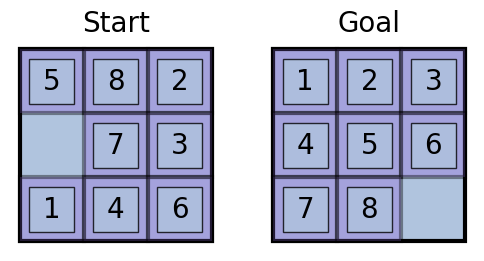

In [5]:
# define start state and goal state
start_state_tiles = [[5,8,2],[0,7,3],[1,4,6]]
goal_state_tiles = [[1,2,3],[4,5,6],[7,8,0]]
start_state = eightPuzzle(start_state_tiles)
goal_state = eightPuzzle(goal_state_tiles)

# plot the start state and the goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
plot(start_state, axes[0], 'Start')
plot(goal_state, axes[1], 'Goal')
plt.show()

/tmp/ipykernel_24515/2472393362.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  _, ax = plt.subplots(1)


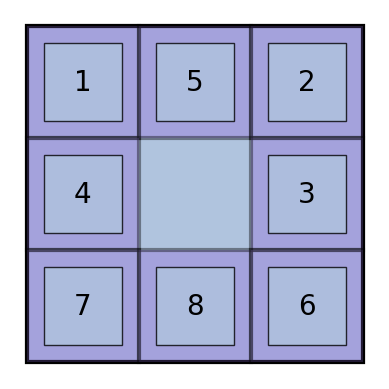

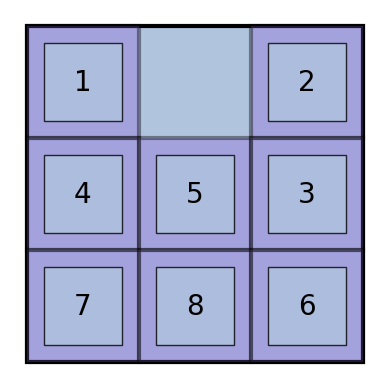

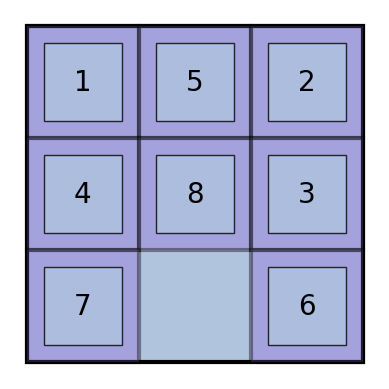

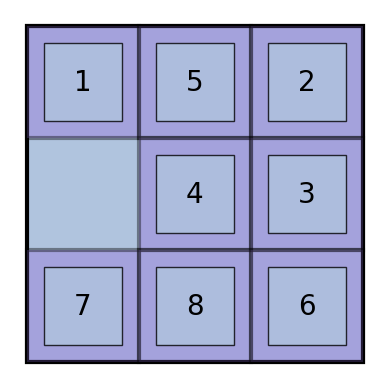

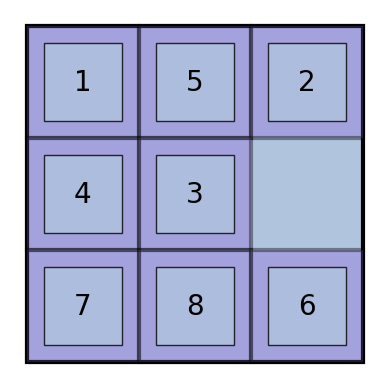

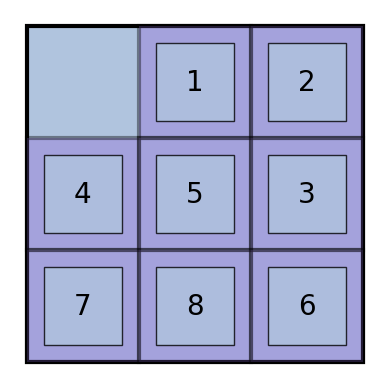

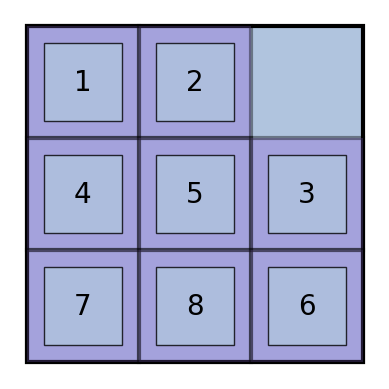

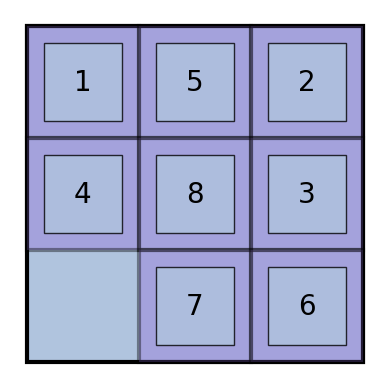

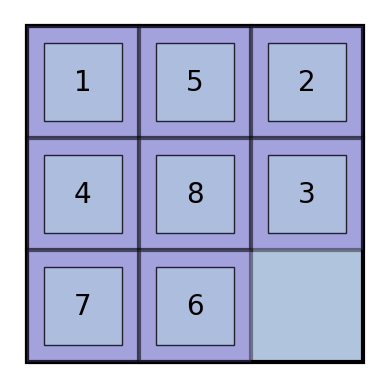

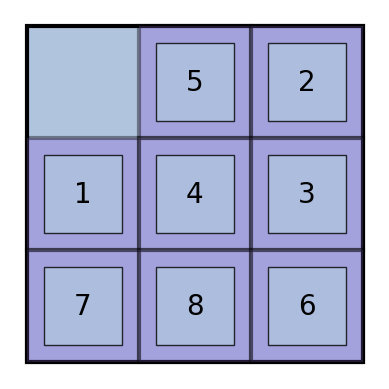

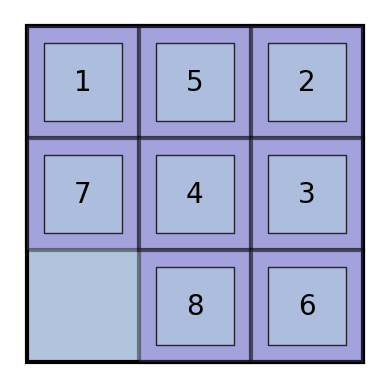

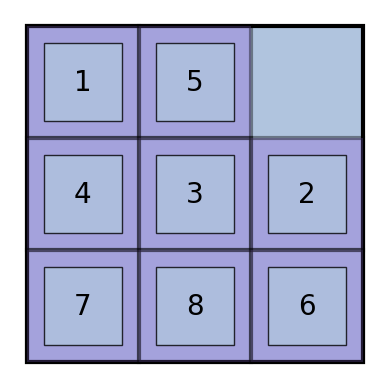

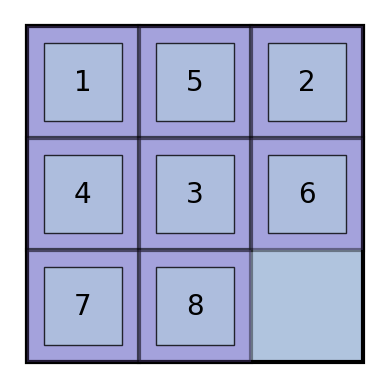

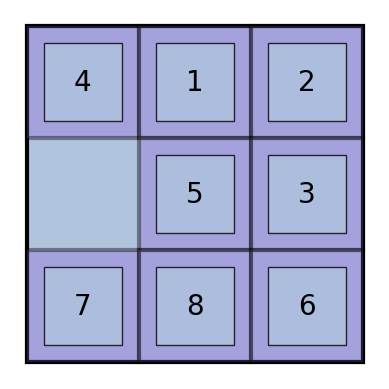

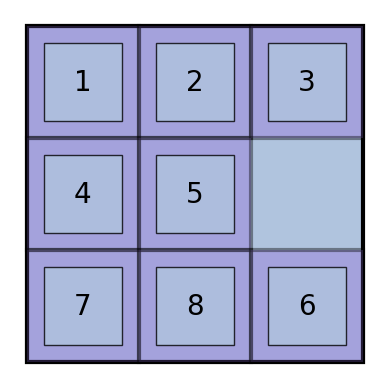

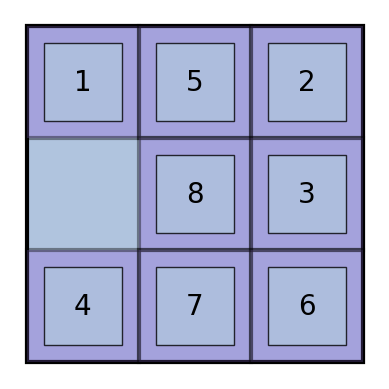

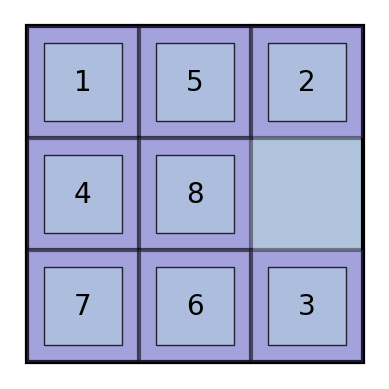

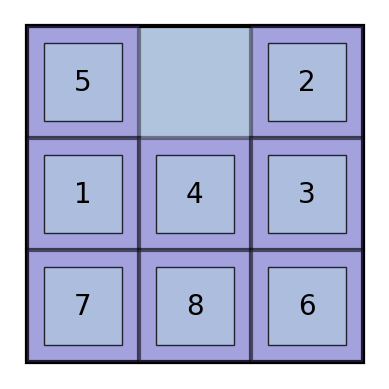

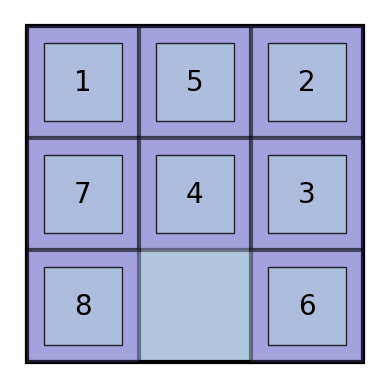

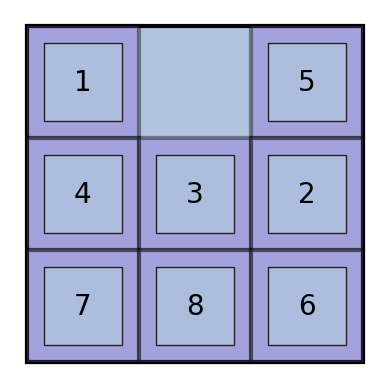

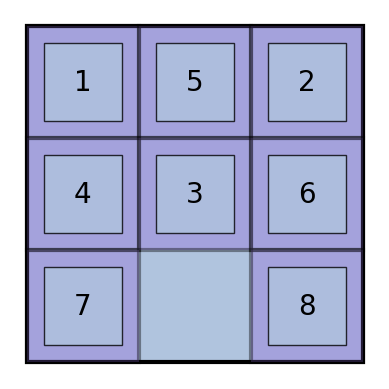

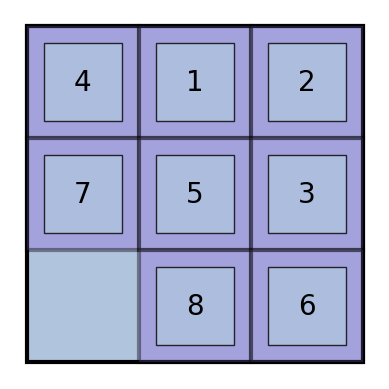

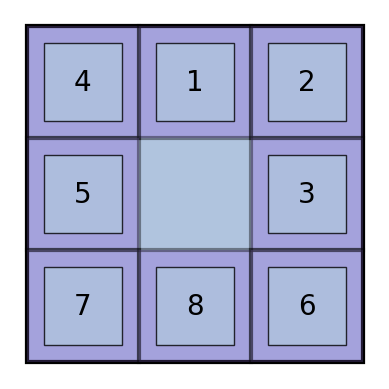

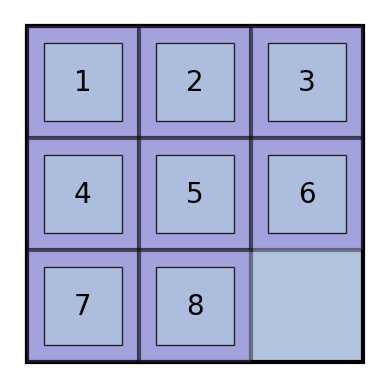

In [9]:
from eightPuzzle import eightPuzzle
from node import Node
from heuristics import manhattanDistance, misplacedTiles        
def func(x,y): return 0

nodeList = []

def breadthFirstSearch(puzzle: eightPuzzle) -> (list,list):
    root = Node(puzzle.grid, func) # Create the root node
    if root.puzzle.solved(): return root.solution
    frontier = []
    explored = dict()
    frontier.append(root)
    nodeList.append(root)
    plot(root.puzzle)
    while frontier:
        node = frontier.pop(0)
        explored[node] = node
        for child in node.nodeChildren():
            if child not in explored and child not in frontier:
                nodeList.append(child)
                plot(child.puzzle)
                if child.puzzle.solved():
                    return child.solution
                frontier.append(child)
    return ["failure"]

start_state_tiles = [[1,5,2],[4,0,3],[7,8,6]]
goal_state_tiles = [[1,2,3],[4,5,6],[7,8,0]]
start_state = eightPuzzle(start_state_tiles)

solution = breadthFirstSearch(start_state)